In [1]:
"""
Created on Tue Jun 20 17:57:46 2023
Source: https://www.kaggle.com/code/karan842/pneumonia-detection-transfer-learning-94-acc
@author: Kiman Park
"""

import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

C:\Users\brian\Anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
cwd = os.getcwd()

In [3]:
train_normal_file = cwd + r"\archive\chest_xray\train\NORMAL"
train_pneumonia_file = cwd + r"\archive\chest_xray\train\PNEUMONIA"
test_normal_file = cwd + r"\archive\chest_xray\test\NORMAL"
test_pneumonia_file = cwd + r"\archive\chest_xray\test\PNEUMONIA"
validation_normal_file = cwd + r'\archive\chest_xray\val\NORMAL'
validation_pneumonia_file = cwd + r'\archive\chest_xray\val\PNEUMONIA'

In [5]:
print('-'*7 + ' Train Set ' + '-'*7)
print('Normal: ', len(os.listdir(train_normal_file)))
print('Pneumonia: ', len(os.listdir(train_pneumonia_file)))
print('-'*7 + ' Test Set ' + '-'*7)
print('Normal: ', len(os.listdir(test_normal_file)))
print('Pneumonia: ', len(os.listdir(test_pneumonia_file)))
print('-'*7 + ' Validation Set ' + '-'*7)
print('Normal: ', len(os.listdir(validation_normal_file)))
print('Pneumonia: ', len(os.listdir(validation_pneumonia_file)))

------- Train Set -------
Normal:  1341
Pneumonia:  3875
------- Test Set -------
Normal:  234
Pneumonia:  390
------- Validation Set -------
Normal:  8
Pneumonia:  8


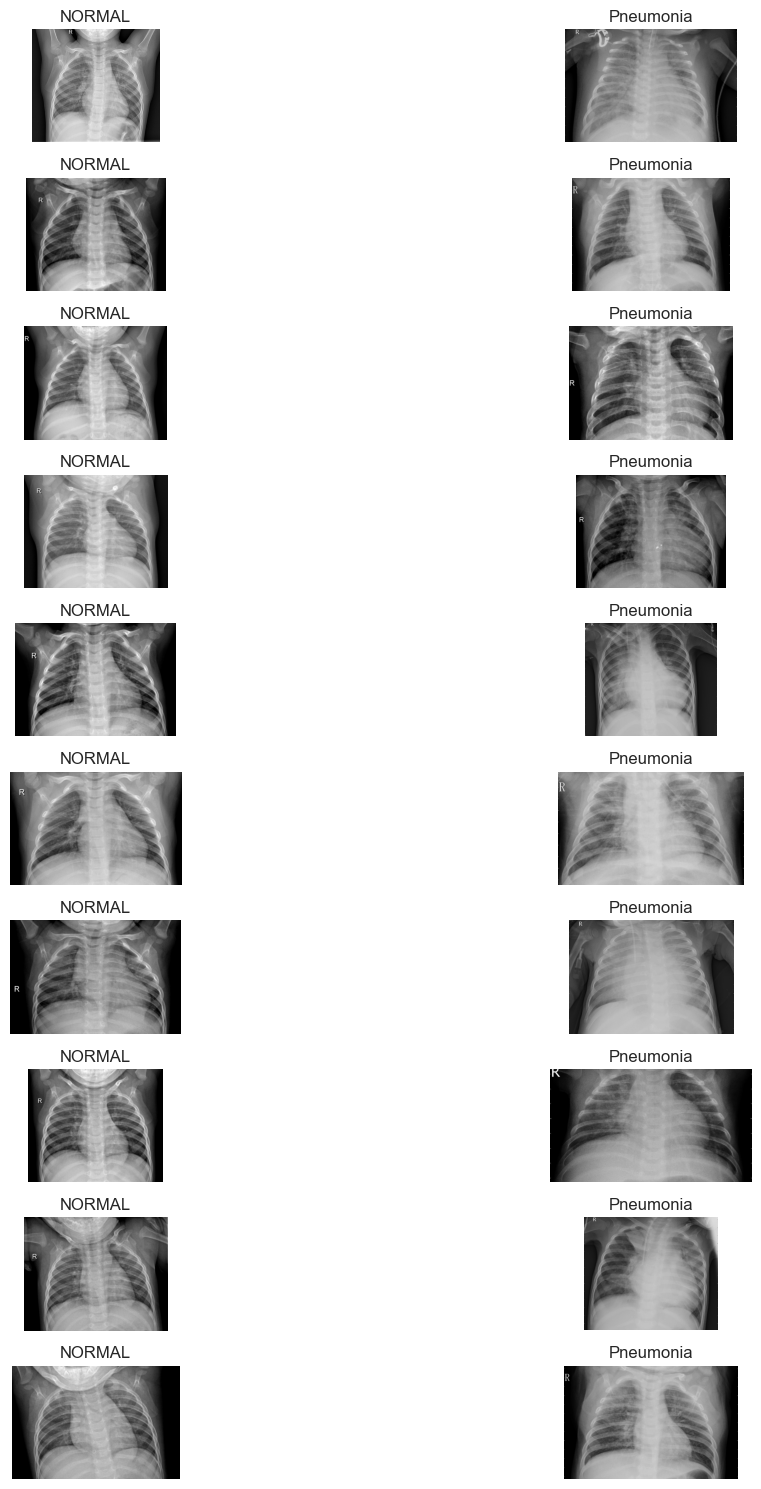

In [32]:
fig, ax = plt.subplots(10, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
for i in range(10):
    img = plt.imread(train_normal_file + '\\' + os.listdir(train_normal_file)[i])
    ax[i,0].set_title("NORMAL")
    ax[i,0].imshow(img, cmap='gray')
    ax[i,0].axis('off')
    img = plt.imread(train_pneumonia_file + '\\' + os.listdir(train_pneumonia_file)[i])
    ax[i,1].set_title("Pneumonia")
    ax[i,1].imshow(img, cmap='gray')
    ax[i,1].axis('off')
plt.tight_layout()
plt.show()

In [33]:
data = pd.DataFrame(np.concatenate([[0]*len(os.listdir(train_normal_file)) , [1]*len(os.listdir(train_pneumonia_file))]),columns=["class"])

In [40]:
data.head()

,class
0,0
1,0
2,0
3,0
4,0


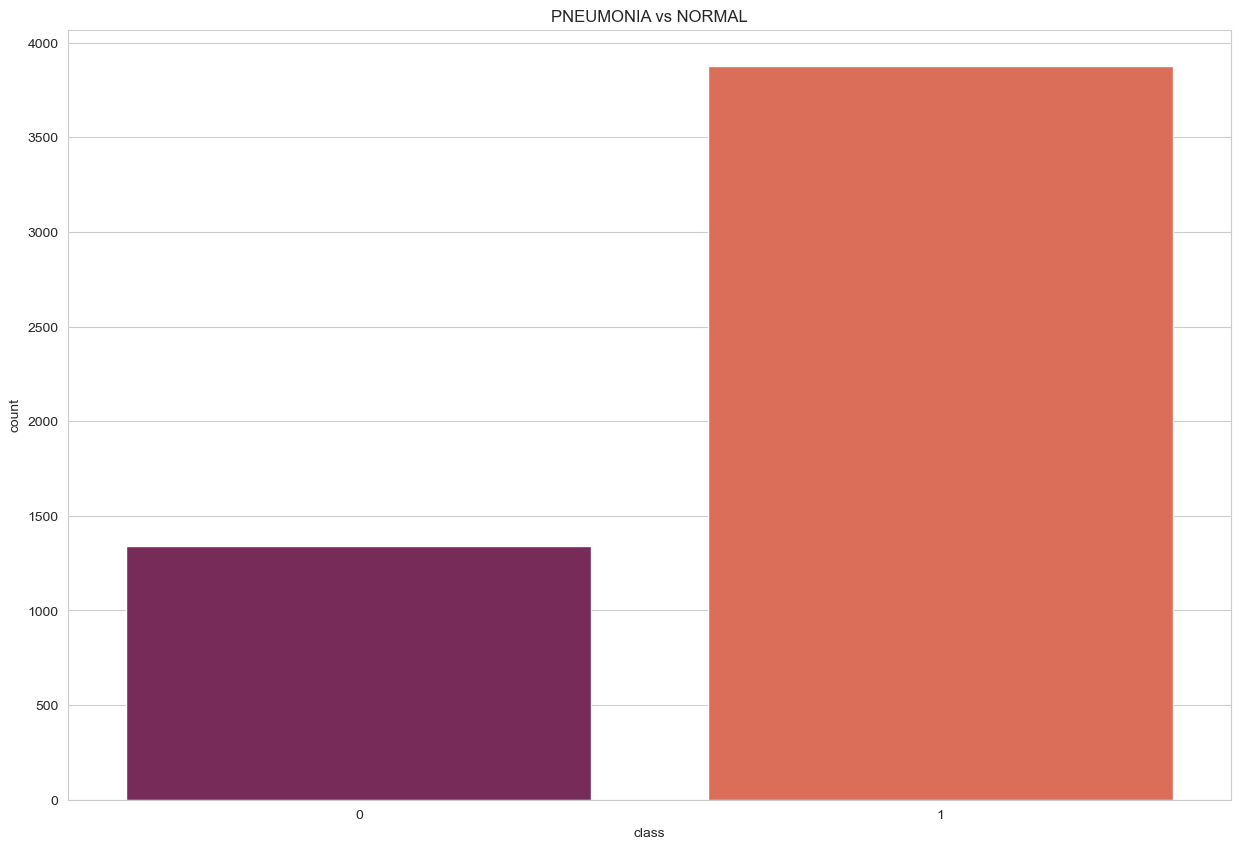

In [47]:
plt.figure(figsize=(15,10))
sns.countplot(x=data['class'],data=data,palette='rocket')
plt.title('PNEUMONIA vs NORMAL')
plt.show()

In [49]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

In [59]:
train = img_Datagen.flow_from_directory(cwd + r"\archive\chest_xray\train\\",
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )
"""
train_pneumonia = img_Datagen.flow_from_directory(train_pneumonia_file,
                                       batch_size=32,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )
"""
test = val_Datagen.flow_from_directory(cwd + r"\archive\chest_xray\test\\",
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
"""
test_pneumonia = val_Datagen.flow_from_directory(test_pneumonia_file,
                                       batch_size=2,
                                       class_mode='binary',
#                                        target_size=(224/,224,3))
                                      )
"""

validation = val_Datagen.flow_from_directory(cwd + r"\archive\chest_xray\val\\",
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )
"""
validation_normal = val_Datagen.flow_from_directory(validation_normal_file,
                                              batch_size=2,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )
"""

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


"\nvalidation_normal = val_Datagen.flow_from_directory(validation_normal_file,\n                                              batch_size=2,\n                                              class_mode='binary',\n#                                               target_size=(224,224,3))\n                                            )\n"

In [64]:
train.filenames[:]

['NORMAL\\IM-0115-0001.jpeg',
 'NORMAL\\IM-0117-0001.jpeg',
 'NORMAL\\IM-0119-0001.jpeg',
 'NORMAL\\IM-0122-0001.jpeg',
 'NORMAL\\IM-0125-0001.jpeg',
 'NORMAL\\IM-0127-0001.jpeg',
 'NORMAL\\IM-0128-0001.jpeg',
 'NORMAL\\IM-0129-0001.jpeg',
 'NORMAL\\IM-0131-0001.jpeg',
 'NORMAL\\IM-0133-0001.jpeg',
 'NORMAL\\IM-0135-0001.jpeg',
 'NORMAL\\IM-0137-0001.jpeg',
 'NORMAL\\IM-0140-0001.jpeg',
 'NORMAL\\IM-0141-0001.jpeg',
 'NORMAL\\IM-0143-0001.jpeg',
 'NORMAL\\IM-0145-0001.jpeg',
 'NORMAL\\IM-0147-0001.jpeg',
 'NORMAL\\IM-0149-0001.jpeg',
 'NORMAL\\IM-0151-0001.jpeg',
 'NORMAL\\IM-0152-0001.jpeg',
 'NORMAL\\IM-0154-0001.jpeg',
 'NORMAL\\IM-0156-0001.jpeg',
 'NORMAL\\IM-0158-0001.jpeg',
 'NORMAL\\IM-0160-0001.jpeg',
 'NORMAL\\IM-0162-0001.jpeg',
 'NORMAL\\IM-0164-0001.jpeg',
 'NORMAL\\IM-0166-0001.jpeg',
 'NORMAL\\IM-0168-0001.jpeg',
 'NORMAL\\IM-0170-0001.jpeg',
 'NORMAL\\IM-0172-0001.jpeg',
 'NORMAL\\IM-0176-0001.jpeg',
 'NORMAL\\IM-0177-0001.jpeg',
 'NORMAL\\IM-0178-0001.jpeg',
 'NORMAL\\

In [61]:
img, label = next(train)

In [65]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in vgg_model.layers:
    layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [66]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer (InputLayer)           │ (None, None, None, 3)         │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, None, None, 64)        │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, None, None, 64)        │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, None, None, 64)        │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, None, None, 128)       │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, None, None, 128)       │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, None, None, 128)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, None, None, 256)       │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv4 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, None, None, 256)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, None, None, 512)       │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv4 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, None, None, 512)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv4 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, None, None, 512)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ glo

 Total params: 20,090,177 (76.64 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [67]:
history = model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1672s 16s/step - accuracy: 0.7599 - loss: 0.5296 - val_accuracy: 0.7500 - val_loss: 0.5623 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1043s 10s/step - accuracy: 0.7911 - loss: 0.4340 - val_accuracy: 0.7500 - val_loss: 0.5265 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1881s 18s/step - accuracy: 0.8280 - loss: 0.3844 - val_accuracy: 0.7500 - val_loss: 0.4732 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 975s 10s/step - accuracy: 0.8171 - loss: 0.3928 - val_accuracy: 0.7500 - val_loss: 0.4929 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1345s 13s/step - accuracy: 0.8323 - loss: 0.3775 - val_accuracy: 0.7500 - val_loss: 0.4496 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 800s 8s/step - accuracy: 0.8278 - loss: 0.3680 - val_accuracy: 0.7500 - val_loss: 0.4415 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1274s 13s/step - accuracy: 0.8339

In [68]:
score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 1988s 12s/step - accuracy: 0.8717 - loss: 0.2930
Train Loss:  0.299497127532959
Train Accuracy:  0.870398759841919


In [69]:
score = model.evaluate(test)

print("Test Loss: ", score[0])
print("Test Accuracy: ", score[1])

312/312 ━━━━━━━━━━━━━━━━━━━━ 267s 856ms/step - accuracy: 0.7517 - loss: 0.4765
Test Loss:  0.4720546007156372
Test Accuracy:  0.754807710647583


Text(0.5, 1.0, 'Accuracy Evolution')

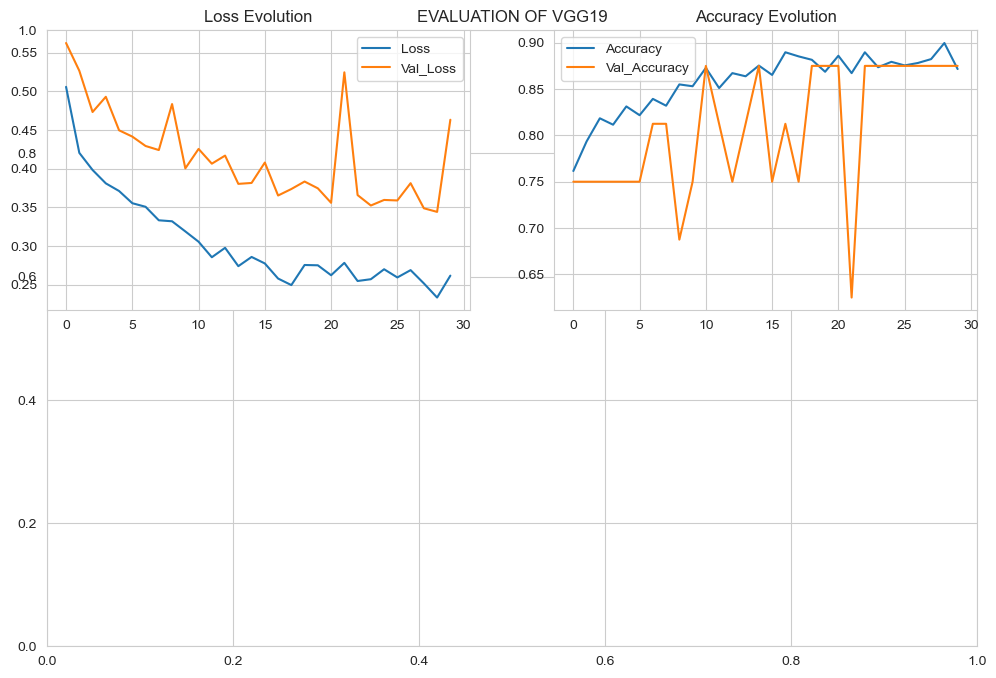

In [70]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [73]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
#    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)

# to avoid overfitting
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=6)

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [74]:
history = model2.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 407s 4s/step - accuracy: 0.8304 - loss: 0.3983 - val_accuracy: 0.9375 - val_loss: 0.2078 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 208s 2s/step - accuracy: 0.9038 - loss: 0.2014 - val_accuracy: 1.0000 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 341s 3s/step - accuracy: 0.9179 - loss: 0.1960 - val_accuracy: 0.9375 - val_loss: 0.1094 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9019 - loss: 0.2112 - val_accuracy: 0.9375 - val_loss: 0.1538 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 310s 3s/step - accuracy: 0.9183 - loss: 0.1974 - val_accuracy: 0.9375 - val_loss: 0.1227 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9332 - loss: 0.1671 - val_accuracy: 0.9375 - val_loss: 0.1947 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 360s 4s/step - accuracy: 0.9339 - loss: 0.

In [75]:
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 505s 3s/step - accuracy: 0.9500 - loss: 0.1338
Train Loss:  0.1404334157705307
Train Accuracy:  0.94804447889328
312/312 ━━━━━━━━━━━━━━━━━━━━ 73s 234ms/step - accuracy: 0.9104 - loss: 0.2114

Test loss:  0.20894496142864227
Test Accuracy:  0.9166666865348816


Text(0.5, 1.0, 'Accuracy Evolution')

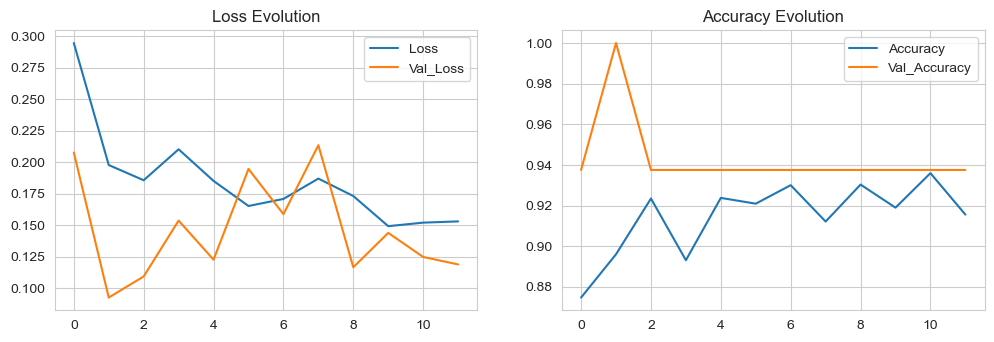

In [76]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [77]:
mobilenet_model = tf.keras.applications.MobileNetV2(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in mobilenet_model.layers:
    layer.trainable=False
    
x = mobilenet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model3 = tf.keras.Model(inputs=mobilenet_model.input, outputs=predictions)

# to avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [78]:
history = model3.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 178s 2s/step - accuracy: 0.8286 - loss: 0.3821 - val_accuracy: 0.7500 - val_loss: 0.3940 - learning_rate: 0.0010
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 918ms/step - accuracy: 0.9006 - loss: 0.2298 - val_accuracy: 0.9375 - val_loss: 0.1884 - learning_rate: 0.0010
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.8952 - loss: 0.2272 - val_accuracy: 0.9375 - val_loss: 0.2127 - learning_rate: 0.0010
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 92s 920ms/step - accuracy: 0.9127 - loss: 0.2002 - val_accuracy: 0.9375 - val_loss: 0.1906 - learning_rate: 0.0010
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9171 - loss: 0.2033 - val_accuracy: 0.9375 - val_loss: 0.1955 - learning_rate: 0.0010
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 87s 867ms/step - accuracy: 0.9121 - loss: 0.1982 - val_accuracy: 0.8750 - val_loss: 0.2866 - learning_rate: 0.0010
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 152s 1s/step - accuracy: 0.9294 - lo

In [79]:
score = model3.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model3.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.9352 - loss: 0.1671
Train Loss:  0.16661667823791504
Train Accuracy:  0.9323236346244812
312/312 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.8894 - loss: 0.2742

Test loss:  0.2731994092464447
Test Accuracy:  0.8894230723381042


Text(0.5, 1.0, 'Accuracy Evolution')

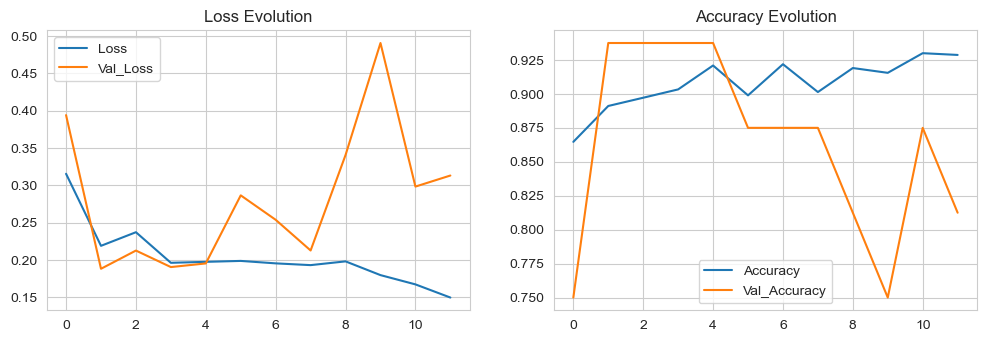

In [80]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [81]:
model.save('vgg19.h5')
model2.save('resnet50v2.h5')
model3.save('mobilenetv2.h5')

In [82]:
resnet_model.trainable = True
vgg_model.trainable = True
mobilenet_model.trainable = True

In [83]:
print("Number of layers in the base model: ", len(vgg_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in vgg_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  22


In [84]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape                  ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer (InputLayer)           │ (None, None, None, 3)         │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv1 (Conv2D)              │ (None, None, None, 64)        │       1,792 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_conv2 (Conv2D)              │ (None, None, None, 64)        │      36,928 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block1_pool (MaxPooling2D)         │ (None, None, None, 64)        │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv1 (Conv2D)              │ (None, None, None, 128)       │      73,856 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_conv2 (Conv2D)              │ (None, None, None, 128)       │     147,584 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block2_pool (MaxPooling2D)         │ (None, None, None, 128)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv1 (Conv2D)              │ (None, None, None, 256)       │     295,168 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv2 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv3 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_conv4 (Conv2D)              │ (None, None, None, 256)       │     590,080 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block3_pool (MaxPooling2D)         │ (None, None, None, 256)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv1 (Conv2D)              │ (None, None, None, 512)       │   1,180,160 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv2 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv3 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_conv4 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block4_pool (MaxPooling2D)         │ (None, None, None, 512)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv1 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv2 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv3 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_conv4 (Conv2D)              │ (None, None, None, 512)       │   2,359,808 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ block5_pool (MaxPooling2D)         │ (None, None, None, 512)       │           0 │
├────────────────────────────────────┼───────────────────────────────┼─────────────┤
│ glo

 Total params: 20,221,765 (77.14 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

 Optimizer params: 131,588 (514.02 KB)

In [85]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [86]:
len(model.trainable_variables)

4

In [87]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1216s 12s/step - accuracy: 0.8916 - loss: 0.2706 - val_accuracy: 0.8750 - val_loss: 0.3681 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 760s 8s/step - accuracy: 0.9005 - loss: 0.2296 - val_accuracy: 0.8750 - val_loss: 0.3656 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1221s 12s/step - accuracy: 0.8952 - loss: 0.2475 - val_accuracy: 0.7500 - val_loss: 0.3872 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 763s 8s/step - accuracy: 0.8936 - loss: 0.2444 - val_accuracy: 0.8125 - val_loss: 0.3703 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1339s 13s/step - accuracy: 0.8933 - loss: 0.2668 - val_accuracy: 0.8750 - val_loss: 0.3884 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 909s 9s/step - accuracy: 0.8770 - loss: 0.2594 - val_accuracy: 0.8750 - val_loss: 0.3623 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 1438s 14s/step - accuracy: 0.8977 - 

In [88]:
score = model.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 2108s 13s/step - accuracy: 0.9032 - loss: 0.2304
Train Loss:  0.22718073427677155
Train Accuracy:  0.9004984498023987
312/312 ━━━━━━━━━━━━━━━━━━━━ 244s 780ms/step - accuracy: 0.8957 - loss: 0.2705

Test loss:  0.3045884072780609
Test Accuracy:  0.8878205418586731


Text(0.5, 1.0, 'Accuracy Evolution')

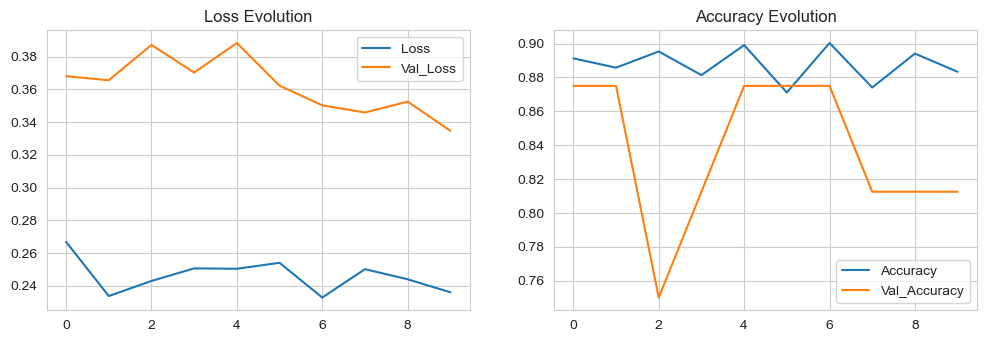

In [89]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_fine.history['loss'], label='Loss')
plt.plot(history_fine.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [90]:
print("Number of layers in the base model: ", len(resnet_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in resnet_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  190


In [91]:
model2.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃     Param # ┃ Connected to                   ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, None, None, 3)     │           0 │ -                              │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, None, None, 3)     │           0 │ input_layer_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, None, None, 64)    │       9,472 │ conv1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, None, None, 64)    │           0 │ conv1_conv[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, None, None, 64)    │           0 │ pool1_pad[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, None, None, 64)    │         256 │ pool1_pool[0][0]               │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, None, None, 64)    │           0 │ conv2_block1_preact_bn[0][0]   │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, None, None, 64)    │       4,096 │ conv2_block1_preact_relu[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_bn             │ (None, None, None, 64)    │         256 │ conv2_block1_1_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_1_relu           │ (None, None, None, 64)    │           0 │ conv2_block1_1_bn[0][0]        │
│ (Activation)                  │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_pad            │ (None, None, None, 64)    │           0 │ conv2_block1_1_relu[0][0]      │
│ (ZeroPadding2D)               │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, None, None, 64)    │      36,864 │ conv2_block1_2_pad[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_bn             │ (None, None, None, 64)    │         256 │ conv2_block1_2_conv[0][0]      │
│ (BatchNormalization)          │                           │             │                                │
├───────────────────────────────┼───────────────────────────┼─────────────┼────────────────────────────────┤
│ conv2_block1_2_relu           │ (None, None, None, 64)    │           0 │ conv2_block1_2_bn[0][0]        │
│ (Activation)                  │                           │             │ 

 Total params: 24,352,005 (92.90 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 23,564,800 (89.89 MB)

 Optimizer params: 524,804 (2.00 MB)

In [92]:
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [93]:
len(model2.trainable_variables)

4

In [94]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model2.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 358s 3s/step - accuracy: 0.9312 - loss: 0.1623 - val_accuracy: 0.8750 - val_loss: 0.2647 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 186s 2s/step - accuracy: 0.9370 - loss: 0.1534 - val_accuracy: 0.9375 - val_loss: 0.1867 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 325s 3s/step - accuracy: 0.9239 - loss: 0.1765 - val_accuracy: 0.9375 - val_loss: 0.1125 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 184s 2s/step - accuracy: 0.9268 - loss: 0.1520 - val_accuracy: 1.0000 - val_loss: 0.1177 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 302s 3s/step - accuracy: 0.9332 - loss: 0.1681 - val_accuracy: 0.8750 - val_loss: 0.1974 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - accuracy: 0.9246 - loss: 0.1573 - val_accuracy: 0.9375 - val_loss: 0.1247 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 306s 3s/step - accuracy: 0.9482 - loss: 0.

In [95]:
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 486s 3s/step - accuracy: 0.9542 - loss: 0.1190
Train Loss:  0.12050466239452362
Train Accuracy:  0.9543711543083191
312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 253ms/step - accuracy: 0.9406 - loss: 0.1953

Test loss:  0.2007220834493637
Test Accuracy:  0.9310897588729858


In [96]:
print("Number of layers in the base model: ", len(mobilenet_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in mobilenet_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  154


In [97]:
model3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [98]:
len(model3.trainable_variables)

4

In [99]:
fine_tune_epochs = 10
epochs_on_raw_model = 30

total_epochs =  epochs_on_raw_model + fine_tune_epochs

history_fine =model3.fit(train,epochs=total_epochs, 
                    validation_data=validation,
                    steps_per_epoch=100,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9202 - loss: 0.1811 - val_accuracy: 0.8750 - val_loss: 0.2578 - learning_rate: 0.0010
Epoch 2/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 93s 928ms/step - accuracy: 0.9230 - loss: 0.1761 - val_accuracy: 0.8750 - val_loss: 0.2377 - learning_rate: 0.0010
Epoch 3/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9228 - loss: 0.1812 - val_accuracy: 0.8125 - val_loss: 0.3756 - learning_rate: 0.0010
Epoch 4/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 85s 849ms/step - accuracy: 0.9283 - loss: 0.1657 - val_accuracy: 0.8750 - val_loss: 0.2700 - learning_rate: 0.0010
Epoch 5/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9379 - loss: 0.1552 - val_accuracy: 0.8750 - val_loss: 0.2436 - learning_rate: 0.0010
Epoch 6/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 83s 831ms/step - accuracy: 0.9181 - loss: 0.1847 - val_accuracy: 0.8750 - val_loss: 0.2494 - learning_rate: 0.0010
Epoch 7/40
100/100 ━━━━━━━━━━━━━━━━━━━━ 149s 1s/step - accuracy: 0.9350 - lo

In [100]:
score = model3.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

score = model3.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

163/163 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.9425 - loss: 0.1465
Train Loss:  0.1460840255022049
Train Accuracy:  0.9415260553359985
312/312 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - accuracy: 0.9155 - loss: 0.2287

Test loss:  0.2657029628753662
Test Accuracy:  0.9038461446762085


Text(0.5, 1.0, 'Accuracy Evolution')

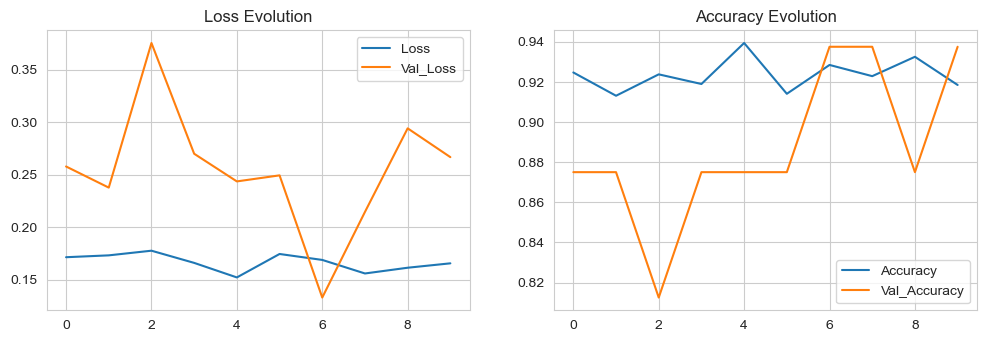

In [101]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history_fine.history['loss'], label='Loss')
plt.plot(history_fine.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history_fine.history['accuracy'], label='Accuracy')
plt.plot(history_fine.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [102]:
model.save('tuned_vgg19.h5')
model2.save('tuned_resnet.h5')
model3.save('tuned_mobilenet.h5')

In [103]:
final_model = tf.keras.models.load_model('tuned_resnet.h5')

In [104]:
y_pred = final_model.predict(test)

312/312 ━━━━━━━━━━━━━━━━━━━━ 80s 249ms/step


In [105]:
final_model.evaluate(test)

312/312 ━━━━━━━━━━━━━━━━━━━━ 79s 243ms/step - accuracy: 0.9407 - loss: 0.1977


[0.20072205364704132, 0.9310897588729858]